# Plotting Gaussians

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

**Define a multivariate Gaussian**

$$
\mathcal{N}(\mathbf{x};\mu,\Sigma) = \frac{1}{{(2 \pi)^\frac{d}{2}} | \Sigma |^\frac{1}{2}} e^{ -\frac{1}{2} (\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k) }
$$

Notice that we use einsum function to compute the argument to the exponent.

In [2]:
def multivariate_gaussian(pos, mu, sig):
    d = mu.shape[0]
    sig_det = np.linalg.det(sig)
    sig_inv = np.linalg.inv(sig)
    c = np.sqrt((2*np.pi)**d * sig_det)
    fac = np.einsum('...j,jk,...k->...', pos-mu, sig_inv, pos-mu)
    return np.exp(-fac/2)/c

**Plotting**

Plot Gaussians on a square defined by (-10,-10) and (10,10). 

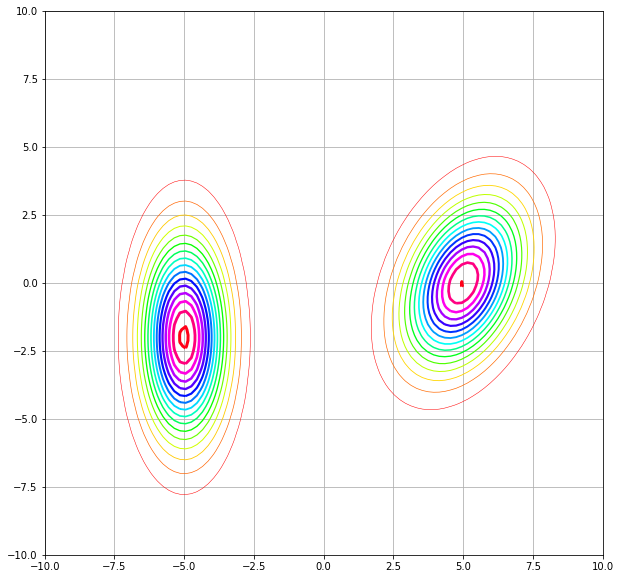

In [3]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
xx, yy = np.meshgrid(x, y)
pos = np.empty(xx.shape + (2,))
pos[:,:,0] = xx
pos[:,:,1] = yy

mu = np.array([-5,-2])
sig = np.array([[1,0],[0,6]])
g = multivariate_gaussian(pos, mu, sig)

mu = np.array([5,0])
sig = np.array([[2,1],[1,4]])
g1 = multivariate_gaussian(pos, mu, sig)


plt.figure(figsize=(10,10))
plt.grid()
plt.contour(pos[:,:,0],pos[:,:,1],g,16,linewidths=np.linspace(0.5,3,16),cmap=cm.hsv)
plt.contour(pos[:,:,0],pos[:,:,1],g1,16,linewidths=np.linspace(0.5,3,16), cmap=cm.hsv)